<a href="https://colab.research.google.com/github/ChinmoyKumerRoy/ChinmoyKumerRoy/blob/main/Aubmentation_NamtaDB_all_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2

In [ ]:
x = np.load('/content/drive/My Drive/Colab Notebooks/LICT/NamtaDB_64_npy/NamtaDB_64_x.npy')/255
y = np.load('/content/drive/My Drive/Colab Notebooks/LICT/NamtaDB_64_npy/NamtaDB_64_y.npy')

In [ ]:
x = x.reshape(-1,64,64,1)
from keras.utils import to_categorical
y = to_categorical(y)

Using TensorFlow backend.


In [ ]:
y.shape

(72045, 10)

In [ ]:
x.shape

(72045, 64, 64, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle= True, random_state=42)

In [ ]:
from keras import Sequential
from keras.layers import MaxPooling2D, Flatten, Dropout, Dense , Conv2D

In [ ]:
 model = Sequential()
    
    
    
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(64,64,1)))
model.add(MaxPooling2D((2,2)))

    
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

    
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

    
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

   
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(2000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam' , loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 512)        

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=5, width_shift_range=0.2, height_shift_range=0.2,  zoom_range=0.2)

datagen.fit(X_train)

In [ ]:
history= model.fit(datagen.flow(X_train, y_train,batch_size=250),validation_data=(X_test, y_test),epochs=20)

Epoch 1/20
231/231 [==============================] - 60s 261ms/step - loss: 1.4064 - accuracy: 0.4711 - val_loss: 0.1886 - val_accuracy: 0.9442
Epoch 2/20
231/231 [==============================] - 50s 218ms/step - loss: 0.1846 - accuracy: 0.9414 - val_loss: 0.0955 - val_accuracy: 0.9718
Epoch 3/20
231/231 [==============================] - 50s 217ms/step - loss: 0.1191 - accuracy: 0.9636 - val_loss: 0.0817 - val_accuracy: 0.9750
Epoch 4/20
231/231 [==============================] - 50s 216ms/step - loss: 0.1054 - accuracy: 0.9678 - val_loss: 0.0642 - val_accuracy: 0.9808
Epoch 5/20
231/231 [==============================] - 50s 215ms/step - loss: 0.0856 - accuracy: 0.9734 - val_loss: 0.0598 - val_accuracy: 0.9840
Epoch 6/20
231/231 [==============================] - 50s 217ms/step - loss: 0.0778 - accuracy: 0.9767 - val_loss: 0.0556 - val_accuracy: 0.9851
Epoch 7/20
231/231 [==============================] - 50s 217ms/step - loss: 0.0734 - accuracy: 0.9777 - val_loss: 0.0490 - val_ac

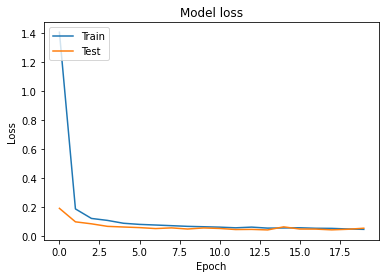

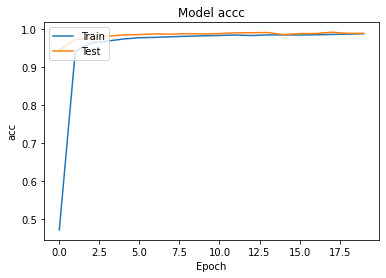

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save_weights('NamtaDB_model_weight.h5')

In [ ]:
model.save('NamtaDB_model.h5')

In [ ]:
import cv2

all_img = []
for i in range(0,10):
  img1 = cv2.imread(str(i)+'.png',0)
  (thresh, im_bw) = cv2.threshold(img1, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  inv = cv2.bitwise_not(im_bw)
  all_img.append(cv2.resize(inv, (64,64)))

In [ ]:
all_img = np.array(all_img)

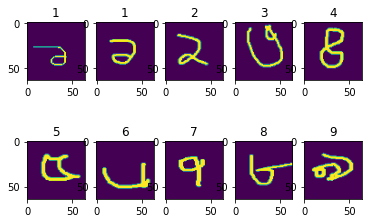

In [ ]:
for i in range(1,11):
  plt.subplot(2,5,i)
  plt.imshow(all_img[i-1])
  plt.title(np.argmax(model.predict(np.reshape(all_img[i-1],(-1,64,64,1)))))


In [ ]:
def segment(image, height=64):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (7, 7), 0)
 
    # threshold the image
    ret,thresh1 = cv2.threshold(gray ,100,255,cv2.THRESH_BINARY_INV)
 
    # dilate the white portions
    dilate = cv2.dilate(thresh1, None, iterations=2)
 
    # find contours in the image
    cnts = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[1] if imutils.is_cv2() else cnts[0]
 
    orig = image.copy()
    i = 0
    t = 0
    c=0
    x_all = []
    w_all = []
    lines = []
    parts = []
 
    for cnt in cnts:
        # Check the area of contour, if it is very small ignore it
        if(cv2.contourArea(cnt) < 100):
            continue
 
        # Filtered countours are detected
        x,y,w,h = cv2.boundingRect(cnt)
        x_all.append(x)
        w_all.append(w)
        i = i + 1
 
    comb = np.zeros((2,len(x_all)))
    comb[0,:]=x_all
    comb[1,:]=w_all
    comb = comb.T
    comb = comb[comb[:,0].argsort()]
 
    x_all = comb[:,0]
    w_all = comb[:,1]
 
 
    for i, item in enumerate (x_all):
        if i < len(x_all)-1:
            lines.append((item+w_all[i]+x_all[i+1])/2)
 
 
    for i in range(len(lines)):
        parts.append(cv2.resize(image[:,t:int(lines[i]),:],(height,height)))
        t = int(lines[i])
        if i == len(lines)-1:
            parts.append(cv2.resize(image[:,t:,:],(height,height)))
   
    return parts

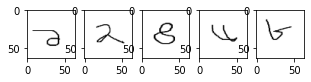

In [ ]:
import cv2
import imutils


image = cv2.imread('/content/test.png')
output = segment(image,64)


for i in range(1,6):
    plt.subplot(2,6,i)
    plt.imshow(output[i-1])

In [ ]:
img_ar = np.array(output)

img_ar.shape

(5, 64, 64, 3)

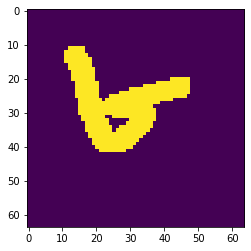

In [ ]:
all=[]

for j in range(len(output)):
    
    img= cv2.imwrite(str(j)+'.png',img_ar[j])
    img=cv2.imread(str(j)+'.png',0)
    gray = cv2.GaussianBlur(img, (7, 7), 0)
    (thresh, im_bw) = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    inv = cv2.bitwise_not(im_bw)
    dilation = cv2.dilate(inv,None,iterations = 1)
    img_r=cv2.resize(dilation, (64,64))
    
    
    all.append(img_r)
    plt.imshow(img_r)

In [ ]:
all_image=np.array(all)

all_image.shape

(5, 64, 64)

Text(0.5, 1.0, '19568')

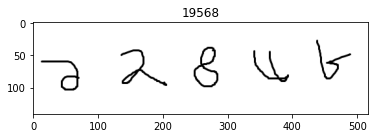

In [ ]:
Image=np.concatenate((output), axis=1)
x=""
for m in range(len(output)):
    x=x+(str(np.argmax(model.predict(np.reshape(all_image[m],(-1,64,64,1))))))

plt.imshow(image)
plt.title(x)